In [147]:
# Data set handling
import pandas as pd

# For plots
import matplotlib.pyplot as plt
import seaborn as sns
# Set theme
sns.set_theme(style="whitegrid")
palette = sns.color_palette("Set2", 8)

In [99]:
df = pd.read_csv('f1_dnf.csv')
df.head()

,resultId,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,...,circuitRef,circuitId,name_y,location,country,lat,lng,alt,date,target_finish
0,2460,136,2002,13,11,4,3.0,77.0,NaN,\N,...,hungaroring,11,McLaren,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,11565,483,1981,1,23,21,0.0,16.0,\N,\N,...,long_beach,43,McLaren,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,18661,772,1958,8,0,26,0.0,0.0,\N,\N,...,nurburgring,20,Maserati,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,25121,1058,2021,8,19,16,0.0,69.0,\N,57,...,red_bull_ring,70,Haas F1 Team,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,8863,383,1988,12,0,30,0.0,0.0,\N,\N,...,monza,14,Euro Brun,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


# Data Engeneering 

`resultlD` is simply id that doesn't give us any information. `driverRef` is a combined information of the `surname` and `forename`. Same for `constructorRef` and `name_y`, `circutRef` and `name`. So, we'll drop excessive information.

Some columns have a lot of "\N" - substitute them with NAs.

In [100]:
filtered_df = (df
               .drop(columns=['resultId', 'surname', 'forename','name_y','name'])
               .replace('\\N', pd.NA)
    )
filtered_df.head()

,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,...,nationality_y,circuitRef,circuitId,location,country,lat,lng,alt,date,target_finish
0,136,2002,13,11,4,3.0,77.0,NaN,<NA>,<NA>,...,British,hungaroring,11,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1
1,483,1981,1,23,21,0.0,16.0,<NA>,<NA>,<NA>,...,British,long_beach,43,California,USA,33.7651,-118.18900,12,1981-03-15,0
2,772,1958,8,0,26,0.0,0.0,<NA>,<NA>,<NA>,...,Italian,nurburgring,20,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0
3,1058,2021,8,19,16,0.0,69.0,<NA>,57,16,...,American,red_bull_ring,70,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0
4,383,1988,12,0,30,0.0,0.0,<NA>,<NA>,<NA>,...,Italian,monza,14,Monza,Italy,45.6156,9.28111,162,1988-09-11,0


In [101]:
# Add some columns and drop unneeded ones
filtered_df['fastestLap_ms'] = (
    pd.to_timedelta('00:' + filtered_df['fastestLapTime'], errors='coerce')
    .dt.total_seconds() * 1000
)
filtered_df.drop(columns=['fastestLapTime'], inplace=True)

filtered_df['driver_age_days'] = (pd.to_datetime(filtered_df['date'], format='%Y-%m-%d', errors='coerce') - 
                                  pd.to_datetime(filtered_df['dob'], format='%Y-%m-%d', errors='coerce')).dt.days
filtered_df.drop(columns=['dob'], inplace=True)

# Keep date column as datetime
filtered_df['date'] = pd.to_datetime(filtered_df['date'], format='%Y-%m-%d', errors='coerce')
filtered_df

,raceId,year,round,grid,positionOrder,points,laps,milliseconds,fastestLap,rank,...,circuitId,location,country,lat,lng,alt,date,target_finish,fastestLap_ms,driver_age_days
0,136,2002,13,11,4,3.0,77.0,NaN,<NA>,<NA>,...,11,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1,NaN,8341
1,483,1981,1,23,21,0.0,16.0,<NA>,<NA>,<NA>,...,43,California,USA,33.7651,-118.18900,12,1981-03-15,0,NaN,12734
2,772,1958,8,0,26,0.0,0.0,<NA>,<NA>,<NA>,...,20,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0,NaN,10372
3,1058,2021,8,19,16,0.0,69.0,<NA>,57,16,...,70,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0,70005.0,8133
4,383,1988,12,0,30,0.0,0.0,<NA>,<NA>,<NA>,...,14,Monza,Italy,45.6156,9.28111,162,1988-09-11,0,NaN,9254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,2006,18,22,12,0.0,70.0,<NA>,62,11,...,18,São Paulo,Brazil,-23.7036,-46.69970,785,2006-10-22,0,73700.0,9160
9996,55,2006,3,16,7,2.0,57.0,5719770,32,6,...,1,Melbourne,Australia,-37.8497,144.96800,10,2006-04-02,1,87690.0,12367
9997,957,2016,10,16,17,0.0,49.0,<NA>,43,12,...,9,Silverstone,UK,52.0786,-1.01694,153,2016-07-10,0,97619.0,8679
9998,501,1980,4,0,25,0.0,0.0,NaN,<NA>,<NA>,...,43,California,USA,33.7651,-118.18900,12,1980-03-30,0,NaN,9936


In [102]:
# Rename columns for easier access
filtered_df = filtered_df.rename(columns={
    'milliseconds': 'total_time_ms',
    'nationality_x': 'driver_nationality',
    'nationality_y': 'constructor_nationality',
})
filtered_df

,raceId,year,round,grid,positionOrder,points,laps,total_time_ms,fastestLap,rank,...,circuitId,location,country,lat,lng,alt,date,target_finish,fastestLap_ms,driver_age_days
0,136,2002,13,11,4,3.0,77.0,NaN,<NA>,<NA>,...,11,Budapest,Hungary,47.5789,19.24860,264,2002-08-18,1,NaN,8341
1,483,1981,1,23,21,0.0,16.0,<NA>,<NA>,<NA>,...,43,California,USA,33.7651,-118.18900,12,1981-03-15,0,NaN,12734
2,772,1958,8,0,26,0.0,0.0,<NA>,<NA>,<NA>,...,20,Nürburg,Germany,50.3356,6.94750,578,1958-08-03,0,NaN,10372
3,1058,2021,8,19,16,0.0,69.0,<NA>,57,16,...,70,Spielberg,Austria,47.2197,14.76470,678,2021-06-27,0,70005.0,8133
4,383,1988,12,0,30,0.0,0.0,<NA>,<NA>,<NA>,...,14,Monza,Italy,45.6156,9.28111,162,1988-09-11,0,NaN,9254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,70,2006,18,22,12,0.0,70.0,<NA>,62,11,...,18,São Paulo,Brazil,-23.7036,-46.69970,785,2006-10-22,0,73700.0,9160
9996,55,2006,3,16,7,2.0,57.0,5719770,32,6,...,1,Melbourne,Australia,-37.8497,144.96800,10,2006-04-02,1,87690.0,12367
9997,957,2016,10,16,17,0.0,49.0,<NA>,43,12,...,9,Silverstone,UK,52.0786,-1.01694,153,2016-07-10,0,97619.0,8679
9998,501,1980,4,0,25,0.0,0.0,NaN,<NA>,<NA>,...,43,California,USA,33.7651,-118.18900,12,1980-03-30,0,NaN,9936


In [ ]:
# Change other columns data types
float_columns = ['total_time_ms', 'fastestLapSpeed']
integer_columns = ['fastestLap', 'rank']
category_columns = ['raceId','driverRef','driver_nationality','constructorRef',
                    'constructor_nationality','circuitRef','location',
                    'country','target_finish']

for col in float_columns:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')
for col in integer_columns:
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce', downcast='integer')
for col in category_columns:
    filtered_df[col] = filtered_df[col].astype('category')

filtered_df.dtypes

raceId                           category
year                                int64
round                               int64
grid                                int64
positionOrder                       int64
points                            float64
laps                              float64
total_time_ms                     float64
fastestLap                        float64
rank                              float64
fastestLapSpeed                   float64
driverRef                        category
driver_nationality               category
constructorRef                   category
constructor_nationality          category
circuitRef                       category
circuitId                           int64
location                         category
country                          category
lat                               float64
lng                               float64
alt                                 int64
date                       datetime64[ns]
target_finish                    c

# EDA

Let's see how driver's age, position order, fastest lap speed (box-plots), location (frequency plots), elevation above the sea level (histogram) correspond to inability to finish the race.

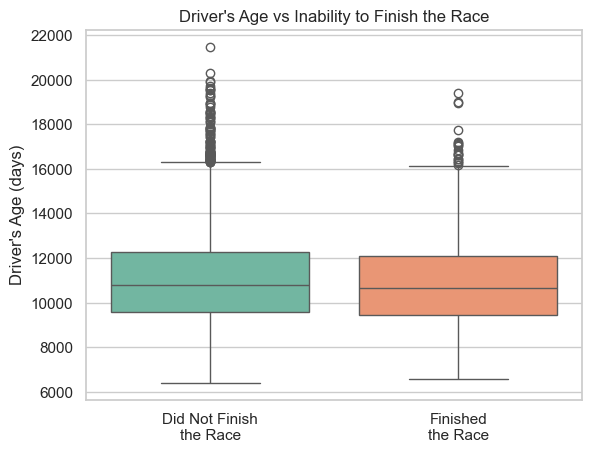

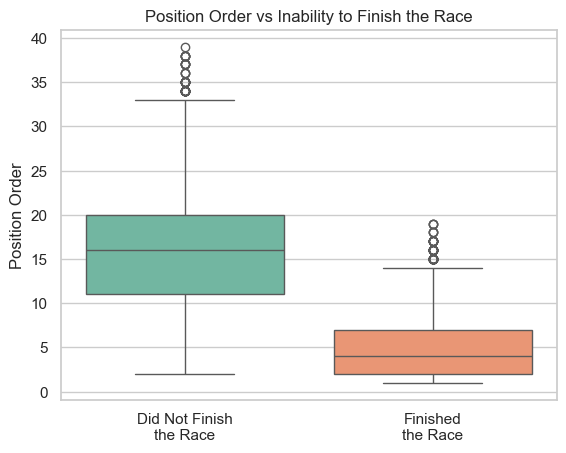

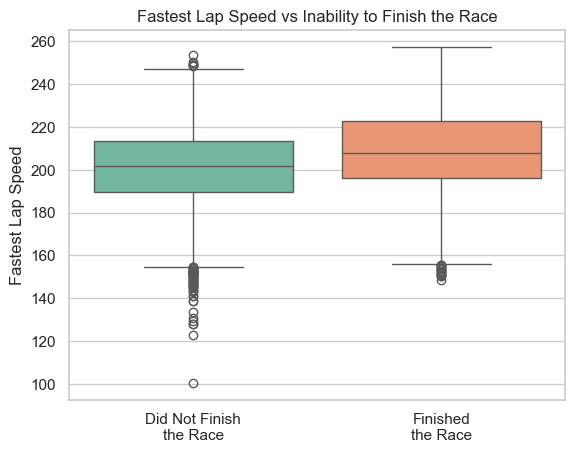

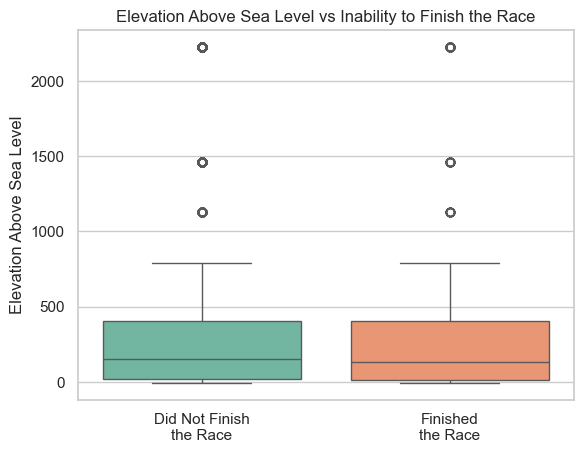

In [148]:
y_cols = ['driver_age_days', 'positionOrder', 'fastestLapSpeed', 'alt']
y_name = ["Driver's Age (days)", 'Position Order', 'Fastest Lap Speed', 'Elevation Above Sea Level']
plt_title = ["Driver's Age vs Inability to Finish the Race",
             'Position Order vs Inability to Finish the Race',
             'Fastest Lap Speed vs Inability to Finish the Race',
             'Elevation Above Sea Level vs Inability to Finish the Race']

for col, col_name, plot_title in zip(y_cols,y_name, plt_title):
    sns.boxplot(data=filtered_df, 
            x='target_finish', y=col,
            hue='target_finish', 
            order=[0, 1], palette=[palette[0],palette[1]])
    plt.xticks([0, 1], ['Did Not Finish\nthe Race', 'Finished\nthe Race'])
    plt.xlabel('')
    plt.ylabel(col_name)
    plt.title(plot_title)
    plt.legend([],[], frameon=False)
    plt.show()

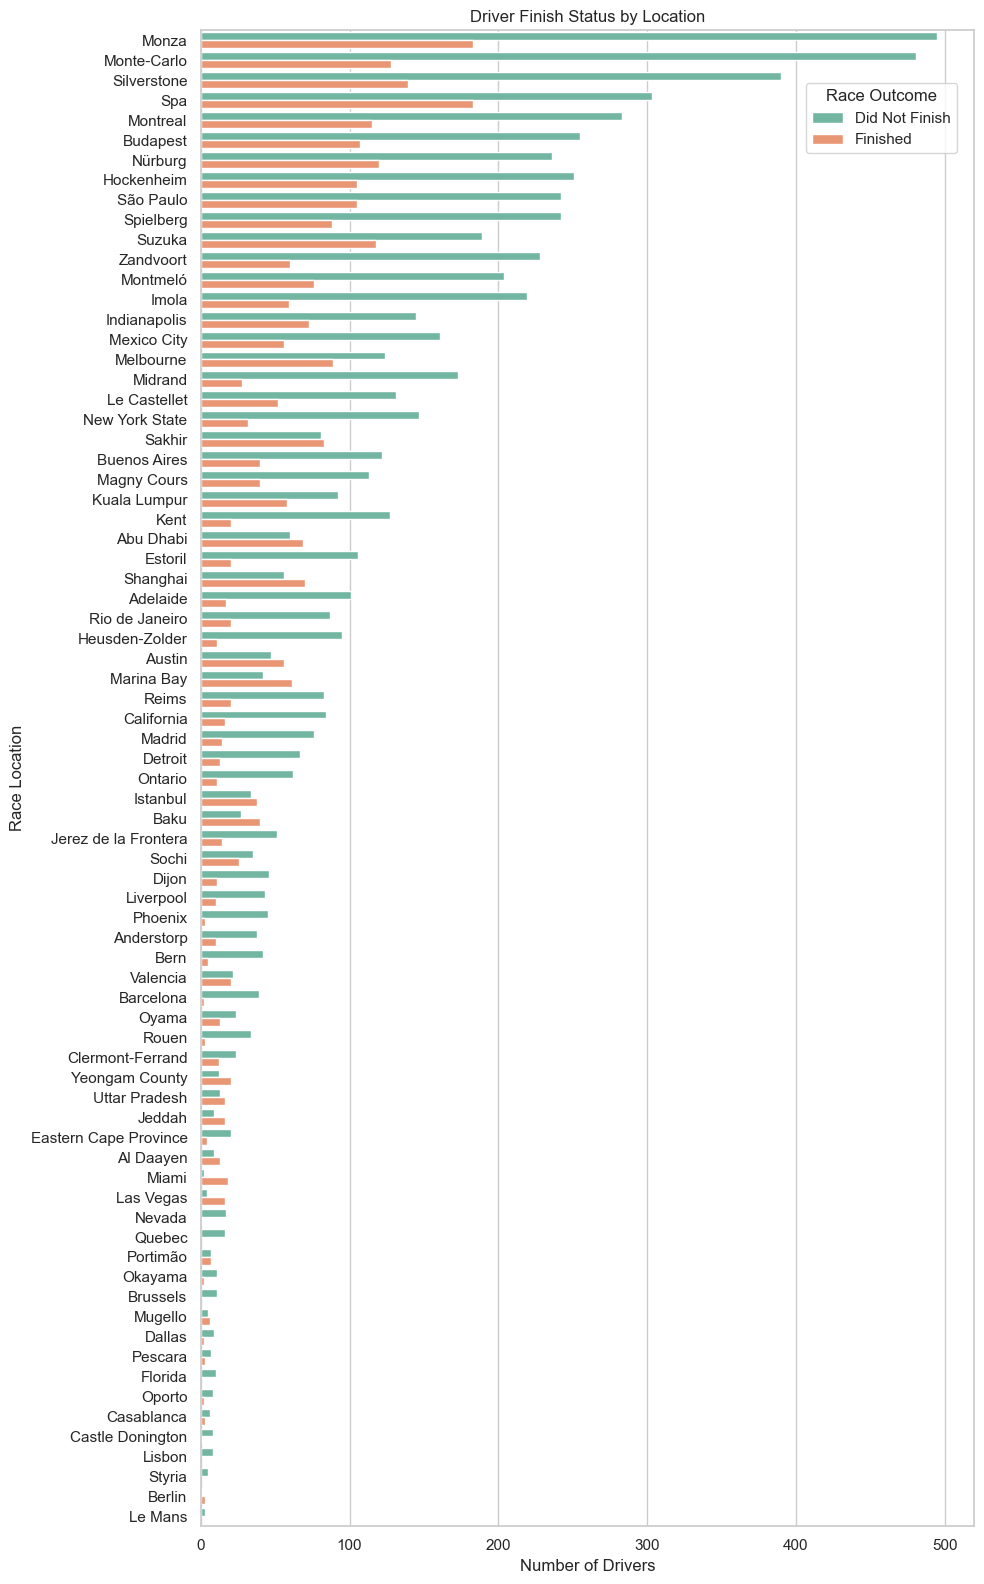

In [169]:
plt.figure(figsize=(10,16)) 
sns.countplot(
    data=filtered_df,
    y='location',
    hue='target_finish',     
    palette=[palette[0], palette[1]],
    order=filtered_df['location'].value_counts().index  # order by frequency
)

plt.ylabel("Race Location")
plt.xlabel("Number of Drivers")
plt.title("Driver Finish Status by Location")
plt.legend(
    title="Race Outcome",
    labels=['Did Not Finish', 'Finished'],
    loc='upper center',         
    bbox_to_anchor=(0.88, 0.97),
    ncol=1
)
plt.tight_layout()
plt.show()

Based on these plots we can see that there are definitely some important factors that can affect whether a driver will or will not finish the race. 

For example, it seems that the starting position can influence that: the closer a driver to the starting line - the more chances that he/she will finish the race. Also, there are some locations that are (probably) very difficult and not everyone can finish the race there.

# Logistic Regression

# Random Forest

# Boosting